In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import torchvision
import copy
from PIL import Image
import os
import json

In [24]:
np.random.seed(42)
BOTH_PROBABILITY = 0.5
NORMAL_PROBABILITY = 0.25
SEPIA_PROBABILITY = 0.25
TRAIN_PERCENTAGE = 0.9
TEST_PERCENTAGE = 0.1

In [25]:
sepia_filter = [[0.393, 0.769, 0.189], [0.349, 0.686, 0.168], [0.272, 0.534, 0.131]]

In [26]:
food101 = torchvision.datasets.Food101(root = './food101')
sampler = torch.utils.data.RandomSampler(food101)

#train_size = int(len(food101) * TRAIN_PERCENTAGE)
#val_size = int(len(food101) * VAL_PERCENTAGE)
#test_size = len(food101) - train_size - val_size

#train_set, val_set, test_set = torch.utils.data.random_split(food101, [train_size, val_size, test_size])
food101 = torch.utils.data.DataLoader(food101, batch_size = 1, num_workers = 0, sampler = sampler)

In [27]:
"""
dataset = torchvision.datasets.ImageFolder('./sepia')
sampler = torch.utils.data.RandomSampler(dataset)
dataset = torch.utils.data.DataLoader(dataset, batch_size = 1, num_workers = 0, shuffle = True)

number = 1
for batch_idx, (image, target) in enumerate(dataset.dataset):
    print(target)
    plt.imshow(image)
    
    number += 1
    if number == 6:
        break
"""

"\ndataset = torchvision.datasets.ImageFolder('./sepia')\nsampler = torch.utils.data.RandomSampler(dataset)\ndataset = torch.utils.data.DataLoader(dataset, batch_size = 1, num_workers = 0, shuffle = True)\n\nnumber = 1\nfor batch_idx, (image, target) in enumerate(dataset.dataset):\n    print(target)\n    plt.imshow(image)\n    \n    number += 1\n    if number == 6:\n        break\n"

In [28]:
def apply_mask_pixel(pixel, mask):
    (r, g, b) = pixel
    new_r = int(r * mask[0][0] + g * mask[0][1] + b * mask[0][2])
    new_g = int(r * mask[1][0] + g * mask[1][1] + b * mask[1][2])
    new_b = int(r * mask[2][0] + g * mask[2][1] + b * mask[2][2])

    return new_r, new_g, new_b

In [29]:
def apply_mask_image(image, mask):
    imageCopy = image.copy()
    (width, height) = imageCopy.size
    for y in range(height - 1):
        for x in range(0, width - 1):
            pixel = imageCopy.getpixel((x, y))
            new_pixel = apply_mask_pixel(pixel = pixel, mask = mask)
            imageCopy.putpixel((x, y), new_pixel)
    return imageCopy

In [30]:
def save_with_probabilities(image, number):
    type = np.random.choice(list(range(3)), size = 1, p = [BOTH_PROBABILITY, NORMAL_PROBABILITY, SEPIA_PROBABILITY])

    if type == 0:
        image_sepia = apply_mask_image(image = image, mask = sepia_filter)
        image.save(os.path.join(os.getcwd(), "sepia", "sepia", "normal", '{number}.jpg'.format(number = number)))
        image_sepia.save(os.path.join(os.getcwd(), "sepia", "sepia", "sepia", '{number}.jpg'.format(number = number)))
    elif type == 1:
        image.save(os.path.join(os.getcwd(), "sepia", "sepia", "normal", '{number}.jpg'.format(number = number)))
    else:
        image_sepia = apply_mask_image(image = image, mask = sepia_filter)
        image_sepia.save(os.path.join(os.getcwd(), "sepia", "sepia", "sepia", '{number}.jpg'.format(number = number)))


In [31]:
number = 0
for batch_idx, (image, target) in enumerate(food101.dataset):
    save_with_probabilities(image, number)
    number += 1
    
    if number == 6000:
        break

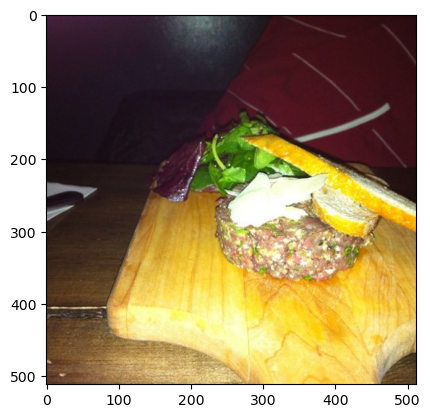

In [32]:
plt.imshow(image)